<a href="https://colab.research.google.com/github/akfalah/03_AhmadKhoirulFalah/blob/main/Week11_Kelompok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


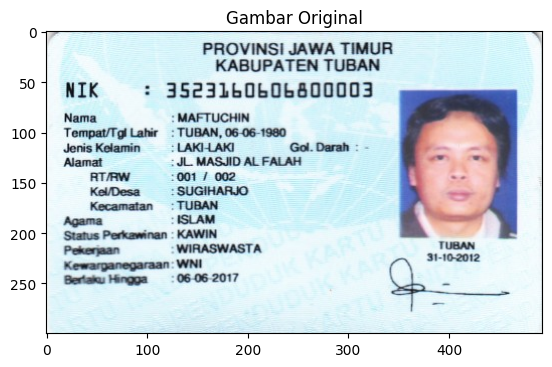

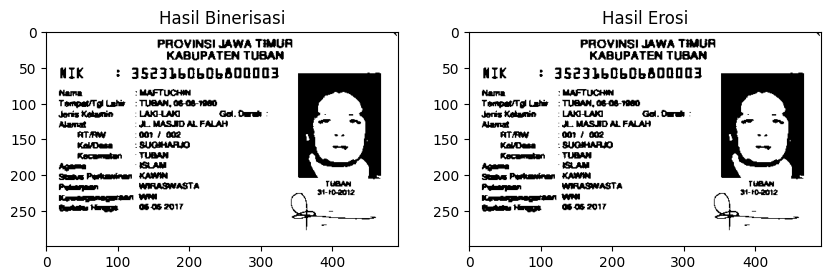

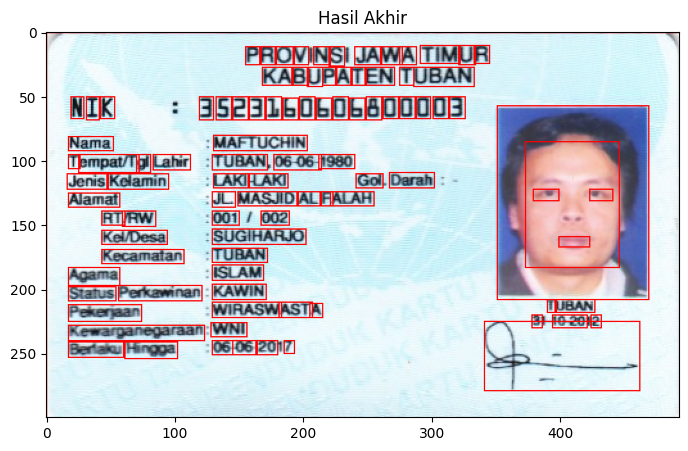

In [6]:
# Load data
ktp_img = cv.imread('/content/drive/MyDrive/pcvk/KTP_More/ktp4.png')
ori = cv.cvtColor(ktp_img.copy(), cv.COLOR_BGR2RGB)

# Gaussian Blur untuk mengurangi noise
blurred = cv.GaussianBlur(ktp_img, (5, 5), 0.5)

# Konversi ke citra grayscale
gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)

# Binerisasi dengan metode Otsu
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Erosi setelah operasi binerisasi
erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

# Looping kontur untuk pemilihan berdasarkan ukuran dan rasio
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
        cv.rectangle(ktp_img, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 8 and w >= 8 and float(ras) <= 10:
        cv.rectangle(ktp_img, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 10 and w >= 7 and float(ras) <= 8:
        cv.rectangle(ktp_img, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Menampilkan gambar matplotlib
plt.subplots(1)
plt.title("Gambar Original")
plt.imshow(ori)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].set_title('Hasil Binerisasi')
axs[0].imshow(bw, cmap='gray')

axs[1].set_title('Hasil Erosi')
axs[1].imshow(erode, cmap='gray')

fig1, axs1 = plt.subplots(figsize=(10, 5))
axs1.set_title('Hasil Akhir')
axs1.imshow(cv.cvtColor(ktp_img, cv.COLOR_BGR2RGB))

plt.show()